In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset
dataset = pd.read_csv('../data-files/appended_songs.csv')
dataset = dataset.drop(dataset.columns[0],axis = 1)

In [3]:
dataset.head()

,Title,Artist,Top100,URI,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time_Signature
0,In The End,Linkin Park,0,7KSjlzDJvwAG0utAYE9Vvg,0.476,0.632,9,-6.217,0,0.0376,0.165000,0.337000,0.111,0.132,107.961,184787,4
1,Seven Nation Army,The White Stripes,0,7i6r9KotUPQg3ozKKgEPIN,0.737,0.463,0,-7.828,1,0.0792,0.008170,0.447000,0.255,0.324,123.881,231733,4
2,By The Way,Red Hot Chili Peppers,0,3ZOEytgrvLwQaqXreDs2Jx,0.618,0.938,9,-3.442,1,0.0456,0.017900,0.000000,0.167,0.875,91.455,269000,4
3,Bring Me To Life,Evanescence,0,0COqiPhxzoWICwFCS4eZcp,0.331,0.943,4,-3.188,0,0.0698,0.007210,0.000002,0.242,0.296,94.612,235893,4
4,Last Resort,Papa Roach,0,5W8YXBz9MTIDyrpYaCg2Ky,0.589,0.890,4,-3.719,0,0.0603,0.000481,0.000820,0.201,0.692,90.598,199907,4


In [4]:
#Spilling dataset into features and target variable
X = dataset.iloc[:, 4:15].values
y = dataset.iloc[:, 2].values

In [5]:
X

array([[4.76000e-01, 6.32000e-01, 9.00000e+00, ..., 1.11000e-01,
        1.32000e-01, 1.07961e+02],
       [7.37000e-01, 4.63000e-01, 0.00000e+00, ..., 2.55000e-01,
        3.24000e-01, 1.23881e+02],
       [6.18000e-01, 9.38000e-01, 9.00000e+00, ..., 1.67000e-01,
        8.75000e-01, 9.14550e+01],
       ...,
       [6.98000e-01, 2.02000e-01, 1.00000e+00, ..., 1.22000e-01,
        1.15000e-01, 1.14975e+02],
       [7.29000e-01, 6.88000e-01, 3.00000e+00, ..., 2.95000e-01,
        6.71000e-01, 1.23867e+02],
       [3.62000e-01, 3.79000e-01, 4.00000e+00, ..., 1.21000e-01,
        1.07000e-01, 6.16020e+01]])

In [6]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
#Performing feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [10]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierLR,X = X_train ,y = y_train, cv = 10)

In [11]:
accuracies.mean()

0.8321897073662967

In [12]:
accuracies.std()

0.00046241934358790123

In [13]:
y_pred_LR = classifierLR.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)

<AxesSubplot:>

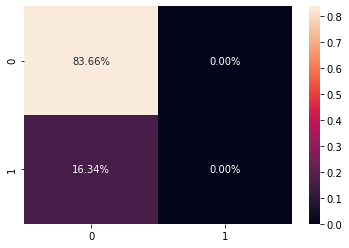

In [16]:
import seaborn as sns
sns.heatmap(cm_LR/np.sum(cm_LR), annot=True, fmt='.2%')

In [17]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred_NB = classifierNB.predict(X_test)

In [19]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

In [20]:
accuraciesNB = cross_val_score(estimator = classifierNB,X = X_train ,y = y_train, cv = 10)

In [21]:
accuraciesNB.mean()

0.6096871846619576

In [22]:
accuraciesNB.std()

0.014031679754404624

<AxesSubplot:>

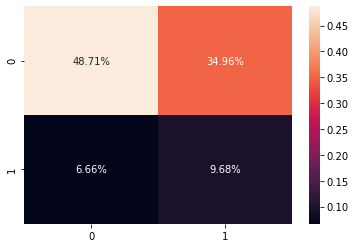

In [23]:
sns.heatmap(cm_NB/np.sum(cm_NB), annot=True, fmt='.2%')

In [24]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred_KNN = classifierKNN.predict(X_test)

In [26]:
accuraciesKNN = cross_val_score(estimator = classifierKNN,X = X_train ,y = y_train, cv = 10)

In [27]:
accuraciesKNN.mean()

0.806962663975782

In [28]:
accuraciesKNN.std()

0.00807328453641559

In [29]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

<AxesSubplot:>

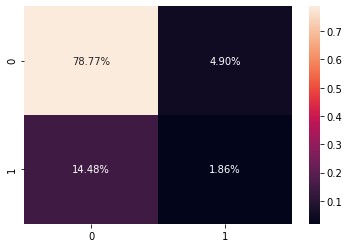

In [30]:
sns.heatmap(cm_KNN/np.sum(cm_KNN), annot=True, fmt='.2%')

In [31]:
#Decesion Tree Classification
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
y_pred_DT = classifierDT.predict(X_test)

In [33]:
accuraciesDT = cross_val_score(estimator = classifierDT,X = X_train ,y = y_train, cv = 10)

In [34]:
accuraciesDT.mean()

0.7480322906155398

In [35]:
accuraciesDT .std()

0.007685600009820225

In [36]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

<AxesSubplot:>

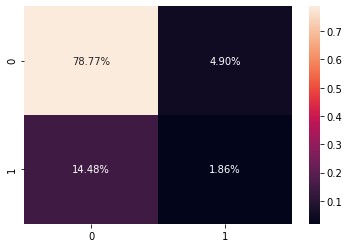

In [37]:
sns.heatmap(cm_KNN/np.sum(cm_KNN), annot=True, fmt='.2%')

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [39]:
y_pred_RF = classifierRF.predict(X_test)

In [40]:
accuraciesRF = cross_val_score(estimator = classifierRF,X = X_train ,y = y_train, cv = 10)

In [41]:
accuraciesRF.mean()

0.8220988900100907

In [42]:
accuraciesRF.std()

0.004353108902143903

In [43]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

<AxesSubplot:>

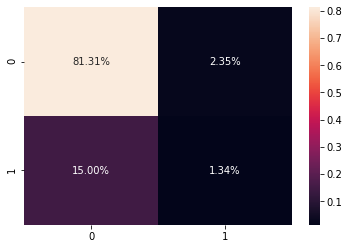

In [44]:
sns.heatmap(cm_RF/np.sum(cm_RF), annot=True, fmt='.2%')

In [45]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear', random_state = 0)
classifierSVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
y_pred_SVM = classifierSVM.predict(X_test)

In [47]:
accuraciesSVM = cross_val_score(estimator = classifierSVM,X = X_train ,y = y_train, cv = 10)

In [48]:
accuraciesSVM.mean()

0.8321897073662967

In [49]:
accuraciesSVM.std()

0.00046241934358790123

In [50]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

<AxesSubplot:>

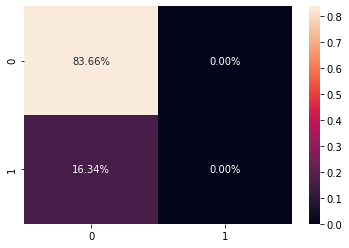

In [51]:
sns.heatmap(cm_SVM/np.sum(cm_SVM), annot=True, fmt='.2%')

In [52]:
#ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
classifierANN = Sequential()

classifierANN.add(Dense(6,input_dim = 11,activation = 'relu' ))
classifierANN.add(Dense(6,activation = 'relu'))
classifierANN.add(Dense(1,activation = 'sigmoid'))

ModuleNotFoundError: No module named 'keras'

In [63]:
classifierANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
history = classifierANN.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6196
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6380
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.6395
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.6395
Epoch 5/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6143 - accuracy: 0.6395
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6395
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6083 - accuracy: 0.6395
Epoch 8/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6060 - accuracy: 0.6395
Epoch 9/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6037 - accuracy: 0.6395
Epoch 10/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6404
Epoch 11/

In [66]:
y_pred_ANN = classifierANN.predict(X_test)
y_pred_ANN = (y_pred_ANN > 0.5)

In [67]:
cm_ANN = confusion_matrix(y_test, y_pred_ANN)

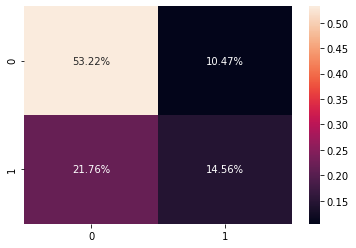

In [68]:
sns.heatmap(cm_ANN/np.sum(cm_ANN), annot=True, fmt='.2%')